# Statistical ML - Homework 1
Yonathan Amare
STAT GR 5241
Spring 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from itertools import combinations

1. Data Analysis

In [2]:
# Loading the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
df = pd.read_csv(url, header=None, na_values = '?')

# Checking out the structure
df.shape, df.head()

((1994, 128),
    0     1        2                    3    4     5     6     7     8     9    \
 0    8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
 1   53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
 2   24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
 3   34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
 4   42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   
 
    ...   118   119   120   121   122  123  124   125   126   127  
 0  ...  0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
 1  ...  0.02  0.12  0.45   NaN   NaN  NaN  NaN  0.00   NaN  0.67  
 2  ...  0.01  0.21  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.43  
 3  ...  0.02  0.39  0.28   NaN   NaN  NaN  NaN  0.00   NaN  0.12  
 4  ...  0.04  0.09  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.03  
 
 [5 rows x 128 columns])

In [3]:
# Naming the columns. Went through dataset documentation to pick which columns to name and include in the dataframe
columns = [
    "state", "county", "community", "communityname", "fold", 
    "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian",
    "racePctHisp", "agePct12t21", "agePct16t24", "agePct65up", # Removed agePct12t29
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf",
    "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", 
    "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad",
    "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ",
    "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv",
    "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par",
    "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg",
    "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly",
    "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous",
    "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR",
    "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded",
    "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
    "OwnOccMedVal", "OwnOccHiQuart", "OwnOccQrange", "RentLowQ", "RentMedian",
    "RentHighQ", "RentQrange", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc",
    "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
    "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked",
    "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop",
    "ViolentCrimesPerPop"
]

len(columns), df.shape[1]

df.columns = columns

In [4]:
print(f"Number of columns in df: {df.shape[1]}")  # Should be 128
print(f"Number of column names assigned: {len(columns)}")  # Should be 128

Number of columns in df: 128
Number of column names assigned: 128


In [5]:
# Replaced "?" with NaN and dropped columns that are entirely NaN (except communityname)
communityname = df['communityname']

df.loc[:, df.columns != "communityname"] = df.loc[:, df.columns != "communityname"].replace("?", pd.NA)
df = df.dropna(axis=1, how="all")
df.isna().sum()

state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64

In [6]:
threshold = len(df) * 0.5 # 50% of dataset size
df.dropna(axis = 1, thresh = threshold, inplace = True)
df.shape[1]

104

In [7]:
numeric_cols = df.columns.drop(['communityname'])  # Excluding column 3
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Filling missing values with mean

df['communityname'] = communityname

In [8]:
df.dtypes

state                    int64
communityname           object
fold                     int64
population             float64
householdsize          float64
                        ...   
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
LemasPctOfficDrugUn    float64
ViolentCrimesPerPop    float64
Length: 104, dtype: object

In [9]:
df.isna().sum().sort_values(ascending=False).head(10)

state               0
communityname       0
PctVacMore6Mos      0
PctVacantBoarded    0
PctHousOwnOcc       0
PctHousOccup        0
HousVacant          0
MedNumBR            0
PctHousLess3BR      0
PctPersDenseHous    0
dtype: int64

In [10]:
df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [11]:
X = df.drop(['communityname', 'ViolentCrimesPerPop'], axis = 1) # Features
y = df['ViolentCrimesPerPop'] # Target: violent crime rate

In [12]:
X.shape, y.shape

((1994, 102), (1994,))

In [13]:
# 4. Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 5. Standardize features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.shape, X_val.shape, X_test.shape

((1196, 102), (399, 102), (399, 102))

In [14]:
non_numeric_cols = X_train.select_dtypes(include = ['object']).columns
non_numeric_cols

Index([], dtype='object')

In [15]:
X_train = X_train.drop(columns = non_numeric_cols)
X_val = X_val.drop(columns = non_numeric_cols)
X_test = X_test.drop(columns = non_numeric_cols)

(a) What are the most important features?

i. Compare and contrast the top features as determined by:

In [16]:
# OLS
ols = LinearRegression()
ols.fit(X_train, y_train)

importance = abs(ols.coef_)

feature_ranking = pd.Series(importance, index = X_train.columns).sort_values(ascending = False)

print("Top 10 OLS Features:")
feature_ranking.head(10)

Top 10 OLS Features:


PctHousLess3BR       0.892275
PctVacMore6Mos       0.725661
blackPerCap          0.368323
pctUrban             0.359191
PersPerOwnOccHous    0.317947
MedRent              0.295365
NumImmig             0.291203
FemalePctDiv         0.281053
RentMedian           0.273867
MedNumBR             0.263495
dtype: float64

In [17]:
# RFE (for stepwise approach)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)
rfe_importance = pd.Series(rfe.ranking_, index=X_train.columns)
rfe_selected = rfe_importance[rfe_importance == 1].index

print("\nFeatures selected by RFE:")
rfe_selected


Features selected by RFE:


Index(['population', 'racepctblack', 'pctUrban', 'whitePerCap', 'PctBSorMore',
       'PctUnemployed', 'PctWorkMomYoungKids', 'MedNumBR', 'PctHousOwnOcc',
       'NumStreet'],
      dtype='object')

In [18]:
# Lasso
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=50, random_state=42)
lasso.fit(X_train, y_train)
lasso_importance = pd.Series(abs(lasso.coef_), index=X_train.columns)
lasso_features = lasso_importance.sort_values(ascending=False)

print("Top 10 Lasso features:")
lasso_features.head(10)

Top 10 Lasso features:


PctImmigRecent         0.203366
racepctblack           0.171315
FemalePctDiv           0.153681
NumStreet              0.137228
PctWorkMomYoungKids    0.113342
PctHousOwnOcc          0.077554
MedNumBR               0.071715
MedYrHousBuilt         0.064361
PctTeen2Par            0.061865
PctVacantBoarded       0.061485
dtype: float64

In [19]:
# Elastic Net
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train, y_train)
elastic_importance = pd.Series(abs(elastic_net.coef_), index=X_train.columns)
elastic_features = elastic_importance.sort_values(ascending=False)

print("\nTop 10 Elastic Net features:")
elastic_features.head(10)


Top 10 Elastic Net features:


PctImmigRecent         0.189986
racepctblack           0.158529
FemalePctDiv           0.143410
NumStreet              0.126532
PctWorkMomYoungKids    0.104400
PctHousOwnOcc          0.080582
MedYrHousBuilt         0.066296
MedNumBR               0.065641
PctVacantBoarded       0.060143
PctTeen2Par            0.056994
dtype: float64

Starting Best Subsets Selection...

Testing 1 features...
Best 1 features: ['PctEmplManu']
MSE: 0.0435

Testing 2 features...
Best 2 features: ['PctEmplManu', 'pctUrban']
MSE: 0.0382

Testing 3 features...
Best 3 features: ['perCapInc', 'PctEmplManu', 'pctUrban']
MSE: 0.0368

Testing 4 features...
Best 4 features: ['MedRent', 'pctWWage', 'PctEmplManu', 'pctUrban']
MSE: 0.0354

Testing 5 features...
Best 5 features: ['MedRent', 'medIncome', 'pctWWage', 'PctEmplManu', 'population']
MSE: 0.0343

Testing 6 features...
Best 6 features: ['medFamInc', 'medIncome', 'perCapInc', 'PctEmplManu', 'pctWFarmSelf', 'population']
MSE: 0.0334

Testing 7 features...
Best 7 features: ['MedRent', 'medFamInc', 'medIncome', 'perCapInc', 'PctEmplManu', 'pctWFarmSelf', 'population']
MSE: 0.0325

Testing 8 features...
Best 8 features: ['MedRent', 'medFamInc', 'medIncome', 'perCapInc', 'PctEmplManu', 'PctUsePubTrans', 'pctWFarmSelf', 'population']
MSE: 0.0321

Testing 9 features...
Best 9 features: ['MedRent', 

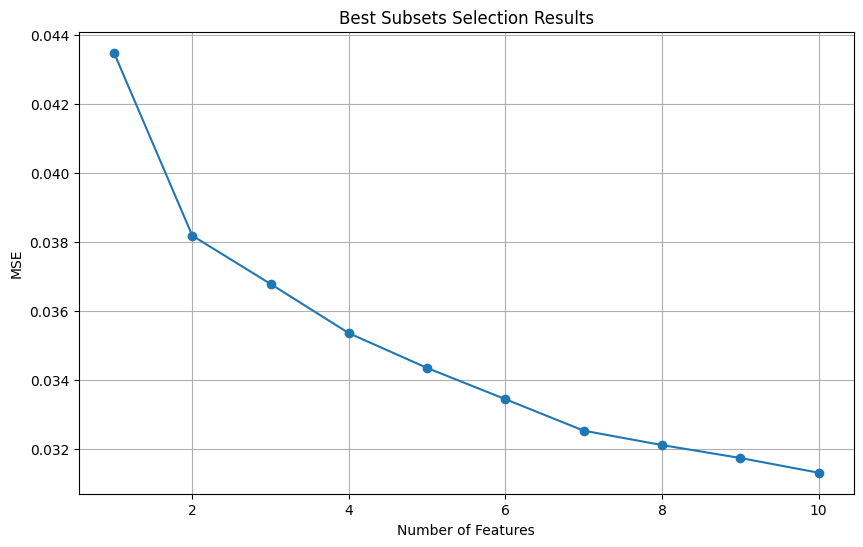

In [20]:
def best_subset_selection(X, y, max_features=10):
    # 1. First, pre-screen features based on correlation with target
    correlations = abs(X.corrwith(pd.Series(y)))
    top_features = correlations.sort_values(ascending=False).head(20).index
    X_reduced = X[top_features]
    
    n_features = len(top_features)
    best_models = {}
    
    # 2. Now do best subsets on reduced feature set
    for k in range(1, min(max_features + 1, n_features + 1)):
        print(f"\nTesting {k} features...")
        best_score = float('inf')
        best_combo = None
        
        # Try combinations from pre-screened features
        for combo in combinations(range(n_features), k):
            X_subset = X_reduced.iloc[:, list(combo)]
            
            # 3. Use simple train/validation split instead of full CV
            model = LinearRegression()
            model.fit(X_subset, y)
            mse = mean_squared_error(y, model.predict(X_subset))
            
            if mse < best_score:
                best_score = mse
                best_combo = combo
        
        selected_features = [X_reduced.columns[i] for i in best_combo]
        best_models[k] = {
            'features': selected_features,
            'score': best_score
        }
        
        print(f"Best {k} features: {selected_features}")
        print(f"MSE: {best_score:.4f}")
    
    return best_models

# Run faster version
print("Starting Best Subsets Selection...")
best_models = best_subset_selection(X_train_scaled, y_train, max_features=10)

# Visualize results
plt.figure(figsize=(10, 6))
mses = [model['score'] for model in best_models.values()]
plt.plot(range(1, len(mses) + 1), mses, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('Best Subsets Selection Results')
plt.grid(True)
plt.show()

ii. Fit and visualize regularization paths for the following methods:

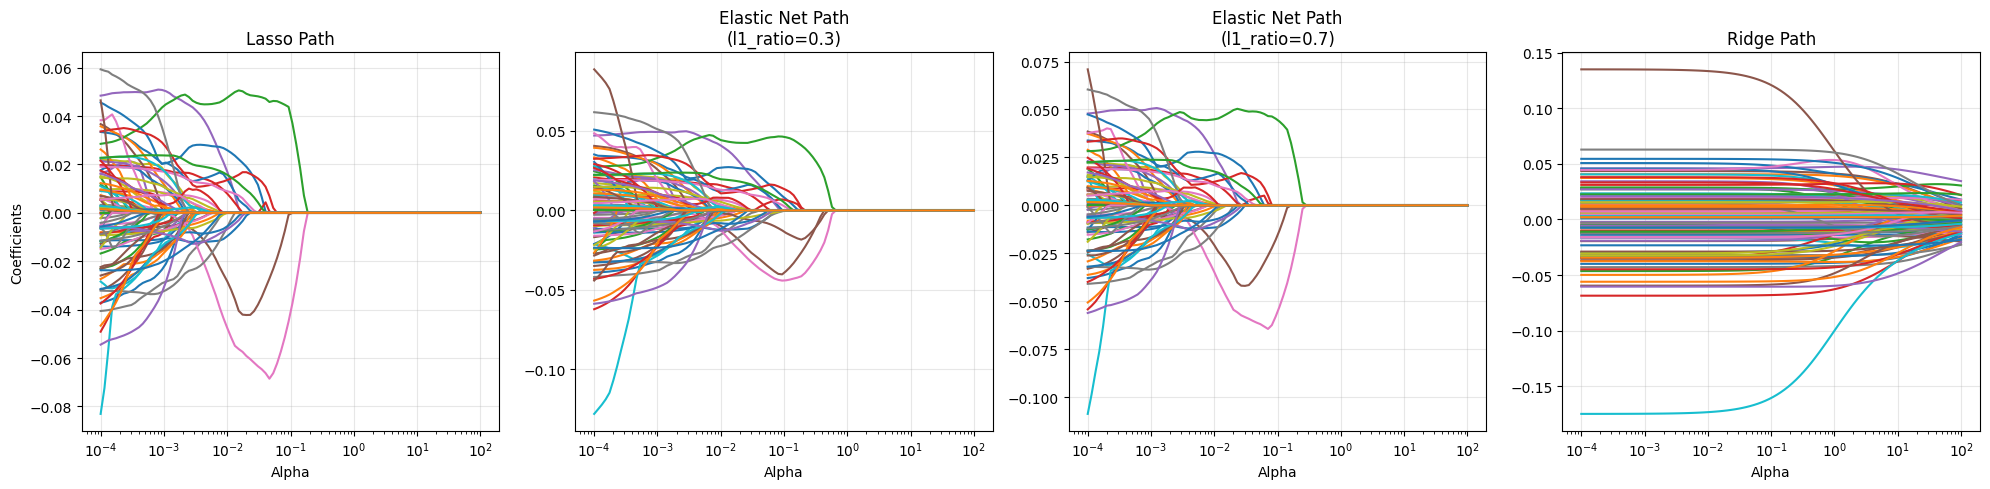

In [21]:
# Create range of alphas for regularization path
alphas = np.logspace(-4, 2, 100)

# Store coefficients for each path
lasso_coefs = []
elastic_coefs1 = []  
elastic_coefs2 = [] 
ridge_coefs = []

# Calculate paths with increased max_iter and better convergence settings
for alpha in alphas:
    # Lasso with increased iterations
    lasso = Lasso(alpha=alpha, max_iter=5000, tol=1e-4)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)
    
    # Elastic Net with l1_ratio = 0.3
    elastic1 = ElasticNet(alpha=alpha, l1_ratio=0.3, max_iter=5000, tol=1e-4)
    elastic1.fit(X_train_scaled, y_train)
    elastic_coefs1.append(elastic1.coef_)
    
    # Elastic Net with l1_ratio = 0.7
    elastic2 = ElasticNet(alpha=alpha, l1_ratio=0.7, max_iter=5000, tol=1e-4)
    elastic2.fit(X_train_scaled, y_train)
    elastic_coefs2.append(elastic2.coef_)
    
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

# Convert to arrays
lasso_coefs = np.array(lasso_coefs)
elastic_coefs1 = np.array(elastic_coefs1)
elastic_coefs2 = np.array(elastic_coefs2)
ridge_coefs = np.array(ridge_coefs)

# Create visualization with improved styling
plt.figure(figsize=(20, 5))

# Lasso path
plt.subplot(141)
plt.semilogx(alphas, lasso_coefs)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Path')
plt.grid(True, alpha=0.3)

# Elastic Net path (l1_ratio=0.3)
plt.subplot(142)
plt.semilogx(alphas, elastic_coefs1)
plt.xlabel('Alpha')
plt.title('Elastic Net Path\n(l1_ratio=0.3)')
plt.grid(True, alpha=0.3)

# Elastic Net path (l1_ratio=0.7)
plt.subplot(143)
plt.semilogx(alphas, elastic_coefs2)
plt.xlabel('Alpha')
plt.title('Elastic Net Path\n(l1_ratio=0.7)')
plt.grid(True, alpha=0.3)

# Ridge path
plt.subplot(144)
plt.semilogx(alphas, ridge_coefs)
plt.xlabel('Alpha')
plt.title('Ridge Path')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

b. Which linear method is best for prediction?

(i) Compare the average prediction MSE on the test set for the following methods:

In [22]:
def best_subset_selection_for_prediction(X_train, y_train, X_val, y_val, X_test, y_test):
    max_features = 5  # Keep small for computational ease
    best_val_error = float('inf')
    best_test_error = None
    
    # Correlations
    correlations = np.array([abs(np.corrcoef(X_train[:, i], y_train)[0, 1]) 
                           for i in range(X_train.shape[1])])
    
    # Indices of top correlated features
    top_feature_indices = np.argsort(correlations)[-15:]  # Get top 15 features
    
    for k in range(1, max_features + 1):
        print(f"Testing {k} features...")
        best_combo_error = float('inf')
        best_combo = None
        
        # Combinations from top features
        for combo in combinations(top_feature_indices, k):
            # Fit model
            model = LinearRegression()
            model.fit(X_train[:, list(combo)], y_train)
            
            # Validate
            val_pred = model.predict(X_val[:, list(combo)])
            val_error = mean_squared_error(y_val, val_pred)
            
            if val_error < best_val_error:
                best_val_error = val_error
                test_pred = model.predict(X_test[:, list(combo)])
                best_test_error = mean_squared_error(y_test, test_pred)
    
    return best_test_error

def evaluate_models(X, y, n_trials=10):
    results = {
        'Least Squares': [],
        'Ridge': [],
        'Lasso': [],
        'Elastic Net': [],
        'RFE': [],
        'Best Subsets': []
    }
    
    for trial in range(n_trials):
        print(f"Trial {trial + 1}/{n_trials}")
        
        # Split data
        X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
        X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=trial)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)
        
        # 1. Least Squares
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        y_pred = lr.predict(X_test_scaled)
        results['Least Squares'].append(mean_squared_error(y_test, y_pred))
        
        # 2. Ridge
        ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100))
        ridge_cv.fit(X_train_scaled, y_train)
        y_pred = ridge_cv.predict(X_test_scaled)
        results['Ridge'].append(mean_squared_error(y_test, y_pred))
        
        # 3. Lasso
        lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), max_iter=10000)
        lasso_cv.fit(X_train_scaled, y_train)
        y_pred = lasso_cv.predict(X_test_scaled)
        results['Lasso'].append(mean_squared_error(y_test, y_pred))
        
        # 4. Elastic Net
        enet_cv = ElasticNetCV(alphas=np.logspace(-4, 4, 20), 
                              l1_ratio=[.1, .3, .5, .7, .9], 
                              max_iter=10000)
        enet_cv.fit(X_train_scaled, y_train)
        y_pred = enet_cv.predict(X_test_scaled)
        results['Elastic Net'].append(mean_squared_error(y_test, y_pred))
        
        # 5. RFE
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
        rfe.fit(X_train_scaled, y_train)
        y_pred = rfe.predict(X_test_scaled)
        results['RFE'].append(mean_squared_error(y_test, y_pred))
        
        # 6. Best Subsets
        results['Best Subsets'].append(best_subset_selection_for_prediction(
            X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test))
    
    return results

# Evaluation
results = evaluate_models(X, y, n_trials=10)

# Average results
avg_results = {method: round(float(np.mean(scores)), 5) for method, scores in results.items()}
std_results = {method: round(float(np.std(scores)), 5) for method, scores in results.items()}

avg_results, std_results

Trial 1/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 2/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 3/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 4/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 5/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 6/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 7/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 8/10
Testing 1 features...
Testing 2 features...
Testing 3 features...
Testing 4 features...
Testing 5 features...
Trial 9/10
Testing 1 features...

({'Least Squares': 0.01865,
  'Ridge': 0.01845,
  'Lasso': 0.01859,
  'Elastic Net': 0.01862,
  'RFE': 0.02033,
  'Best Subsets': 0.02116},
 {'Least Squares': 0.00182,
  'Ridge': 0.00191,
  'Lasso': 0.0019,
  'Elastic Net': 0.0019,
  'RFE': 0.00221,
  'Best Subsets': 0.00192})

(ii) Visualize the comparison results

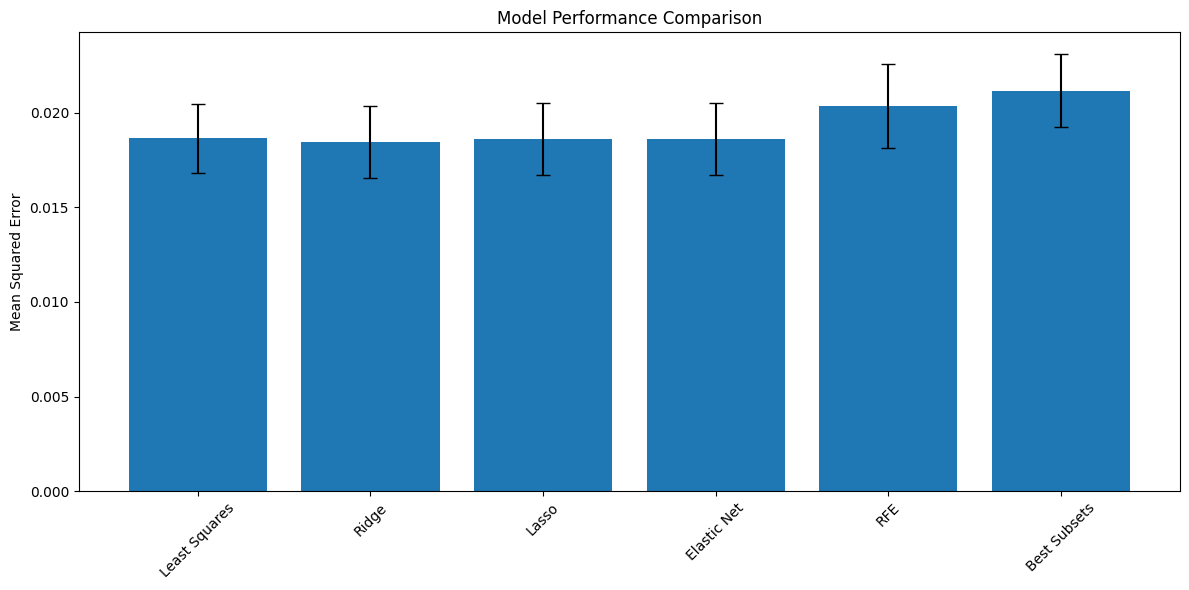

Least Squares:
  Mean MSE: 0.0186
  Std MSE: 0.0018
Ridge:
  Mean MSE: 0.0185
  Std MSE: 0.0019
Lasso:
  Mean MSE: 0.0186
  Std MSE: 0.0019
Elastic Net:
  Mean MSE: 0.0186
  Std MSE: 0.0019
RFE:
  Mean MSE: 0.0203
  Std MSE: 0.0022
Best Subsets:
  Mean MSE: 0.0212
  Std MSE: 0.0019


In [23]:
# Create visualization
plt.figure(figsize=(12, 6))
methods = list(avg_results.keys())
means = list(avg_results.values())
stds = list(std_results.values())

plt.bar(methods, means, yerr=stds, capsize=5)
plt.xticks(rotation=45)
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

# Numerical results
for method in methods:
    print(f"{method}:")
    print(f"  Mean MSE: {avg_results[method]:.4f}")
    print(f"  Std MSE: {std_results[method]:.4f}")